In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# 统计

## 统计与概率

一些统计符号：

- $X$：表示总体样本
- $x$: 表示采样样本
- $N$: 表示总体样本个数
- $n$: 表示采样样本的个数，通常 $N \ge n$
- $\mu、\sigma^2$：表总体样本的均值和方差
- $\mu_x、\sigma^2_x$：表采样本的均值和方差

其中：

- $\mu = \bar{X} = \frac{1}{N}\sum^{N}_{i=1}x_i$
- $\mu_x = \bar{x} = \frac{1}{n}\sum^{n}_{i=1}x_i$
- $\sigma^2 = \frac{1}{N}\sum^{N}_{i=1}(x_i - \mu)^2$
- $\sigma^2_x = \frac{1}{n-1}\sum^{n}_{i=1}(x_i - \mu_x)^2$

如下示例：
```python
In [6]: x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
In [7]: np.mean(x)
Out[7]: 3.10
In [8]: np.median(x)
Out[8]: 3.0
In [9]: x.min(), x.max()
Out[9]: (0.90, 6.70)
# 方差的计算假设用的是全体数据 
In [10]: x.var()
Out[10]: 3.07
In [11]: x.std()
Out[11]: 1.7521415467935233
# 减去一个自由度之后计算
In [12]: x.var(ddof=1)
Out[12]: 3.5085714285714293
In [13]: x.std(ddof=1)
Out[13]: 1.8731181032095732
```

## 随机数

numpy 中的随机数
```python
# 均匀分布，值在[0,1) 之间，传入整数表示生成的数量
In [14]: np.random.rand()
Out[14]: 0.532833024789759
In [16]: np.random.rand(5)
Out[16]: array([ 0.71356403, 0.25699895, 0.75269361, 0.88387918, 0.15489908])
    
# 标准正态分布，均值为 0，方差为 1
# 传入多个整数表示生成的行数与列数
In [15]: np.random.randn()
Out[15]: 0.8768342101492541
In [17]: np.random.randn(2, 4)
Out[17]: array([[ 3.13325952, 1.15727052, 1.37591514, 0.94302846],
                [ 0.8478706 , 0.52969142, -0.56940469, 0.83180456]])

# 均匀分布，生成在[low, high)之间的整数
# 或者只传入上限和生成的个数
In [18]: np.random.randint(10, size=10)
Out[18]: array([0, 3, 8, 3, 9, 0, 6, 9, 2, 7])
In [19]: np.random.randint(low=10, high=20, size=(2, 10))
Out[19]: array([[12, 18, 18, 17, 14, 12, 14, 10, 16, 19],
                [15, 13, 15, 18, 11, 17, 17, 10, 13, 17]])
```

各个方法的生成数据的方式如下, `rand,randint` 趋向于均匀分布，`randn` 趋向于高斯正态分布：

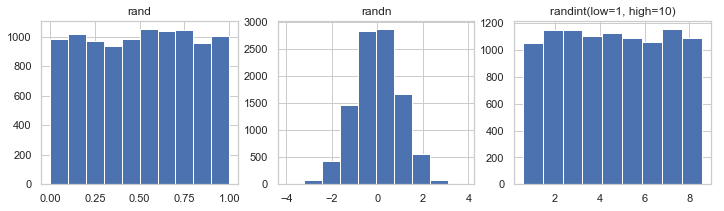

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")
plt.show()

生成唯一随机数列：
```python
In [21]: np.random.choice(10, 5, replace=False)
Out[21]: array([9, 0, 5, 8, 1])
In [22]: np.random.choice(10, 5, replace=True)
Out[22]: array([0, 8, 8, 4, 4])
```

使用 `seed` 初始化随机数生成状态：
```python
In [22]: np.random.seed(123456789)
In [23]: np.random.rand()
Out[23]: 0.532833024789759
In [24]: np.random.seed(123456789); np.random.rand()
Out[24]: 0.532833024789759
``` 

`seed` 生成的是全局状态，使用 `RandomState` 可以生成更细粒度的控制
```python
In [25]: prng = np.random.RandomState(123456789)
In [26]: prng.rand(2, 4)
Out[26]: array([[ 0.81854739, 0.09790852, 0.00355391, 0.23080962],
                [ 0.01225513, 0.35354171, 0.18528148, 0.7927684 ]])
```

其他相关的分布，如 $\chi^2$ 分布，t 分布，F 分布等，二项分布，泊松分布：
```python
In [27]: prng.chisquare(1, size=(2, 2))
Out[27]: array([[ 0.78631596, 0.19891367],
                [ 0.11741336, 2.8713997 ]])
In [28]: prng.standard_t(1, size=(2, 3))
Out[28]: array([[ 0.39697518, -0.19469463, 1.15544019],
                [-0.65730814, -0.55125015, 0.13578694]])
In [29]: prng.f(5, 2, size=(2, 4))
Out[29]: array([[ 0.45471421, 17.64891848, 1.48620557, 2.55433261],
                [ 1.21823269, 3.47619315, 0.50835525, 0.70599655]])
In [30]: prng.binomial(10, 0.5, size=10)
Out[30]: array([4, 5, 6, 7, 3, 5, 7, 5, 4, 5])
In [31]: prng.poisson(5, size=10)
Out[31]: array([3, 5, 5, 5, 0, 6, 5, 4, 6, 3])
```

## 随机变量与分布

SciPy 提供的随机变量如下：
![image](https://wx4.sinaimg.cn/large/69d4185bly1fybw2yff7lj20ih0ba40l.jpg)

SciPy 随机函数的使用：
```python
# 生成均值为1 ，标准差为 0.5 的随机分布变量
In [32]: X = stats.norm(1, 0.5)
# 基本统计信息
In [33]: X.mean()
Out[33]: 1.0
In [34]: X.median()
Out[34]: 1.0
In [35]: X.std()
Out[35]: 0.5
In [36]: X.var()
Out[36]: 0.25
# 矩
In [37]: [X.moment(n) for n in range(5)]
Out[37]: [1.0, 1.0, 1.25, 1.75, 2.6875]

# 统计分布独立列表
In [38]: X.stats()
Out[38]: (array(1.0), array(0.25))

# 其他
In [39]: X.pdf([0, 1, 2])
Out[39]: array([ 0.10798193, 0.79788456, 0.10798193])
In [40]: X.cdf([0, 1, 2])
Out[40]: array([ 0.02275013, 0.5 , 0.97724987])

# 给定百分比的置信区间
In [41]: X.interval(0.95)
Out[41]: (0.020018007729972975, 1.979981992270027)
In [42]: X.interval(0.99)
Out[42]: (-0.28791465177445019, 2.2879146517744502)
```

通过图直观的展示：

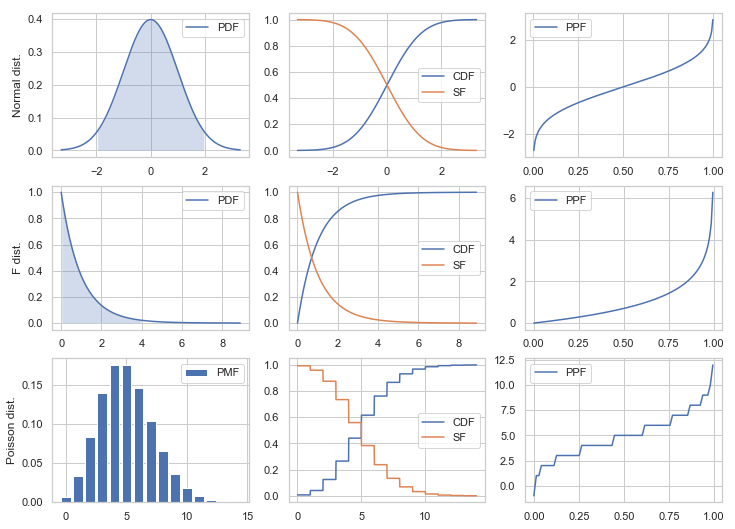

In [13]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF or PMF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)
    
    if hasattr(X.dist, "pdf"):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        # discrete random variables do not have a pdf method, instead we use pmf:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
        
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

plt.show()

另一种生成分布的方法，使用类的方法：
```python
In [45]: stats.norm.stats(loc=2, scale=0.5)
Out[45]: (array(2.0), array(0.25))

# 通过随机变量调用，如之前的方法
In [46]: stats.norm(loc=1, scale=0.5).stats()
Out[46]: (array(1.0), array(0.25))
```

对随机变量的采样：
```python
# rvs: random variable sample, 采样 10 个数
In [47]: X = stats.norm(1, 0.5)
In [48]: X.rvs(10)
Out[48]: array([ 2.106451 , 2.0641989 , 1.9208557 , 1.04119124, 1.42948184,
                0.58699179, 1.57863526, 1.68795757, 1.47151423, 1.4239353 ])

```

随机变量分布采样与概率分布函数的比较：

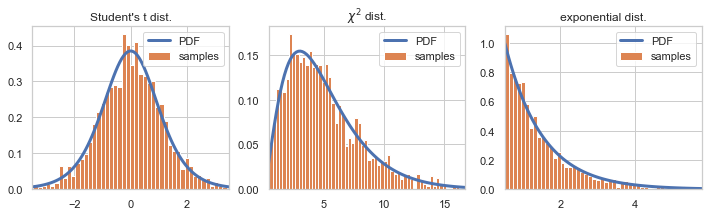

In [16]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    
    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)
    
    ax.plot(x, X.pdf(x), label="PDF", lw=3)
    ax.hist(X_samples, label="samples", density=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000
# Student's t distribution
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])
# The chisquared distribution
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])
# The exponential distribution
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])

plt.show()

拟合数据分布：

In [17]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale

(5.3521519459975568, 0.079001142133401994, 0.89428132060172738)

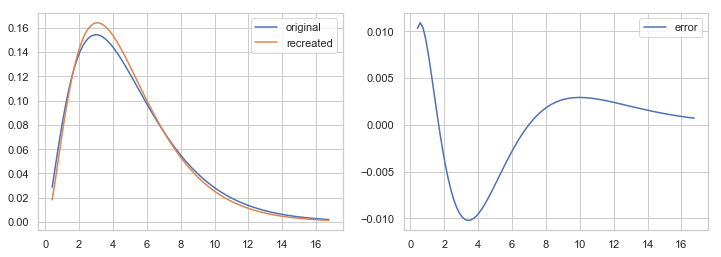

In [18]:
# 通过返回参数重新生成分布
Y = stats.chi2(df=df, loc=loc, scale=scale)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()
plt.show()

## 假设测试

进行假设的步奏：
1. 确定零假设（NULL hypothesis）和替代假设
1. 选择测试统计，使得他在零假设下的采样分布式已知的（精确或者近似）
1. 搜集数据
1. 在零假设下，通过搜集的数据计算测试统计和 p 值
1. 如果 p 值小于预定义的置信度 α，那么零假设被拒绝，如果 p 值大，那么就接受零假设。

其中有两种类型的错误，一种是本来不该拒绝的我们拒绝了零假设，成为一类型错误；第二种是本来应该拒绝的，但却接受了零假设，称为二类型错误。为了折中这两种错误，需要选定合适的置信水平。

常用的假设测试案例如下：
![image](https://wx4.sinaimg.cn/large/69d4185bly1fybztaibuej20ik0buq5q.jpg)

有如下零假设，一个随机变量 X 的均值 $\mu_0 = 1$，给定采样 X ，我们测试采样数据是否兼容零假设。此处模拟采样 100 个数据，但是从与宣称的零假设不一样的分布（$\mu = 0.8$）

In [19]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)

有了 X_samples 我们就要计算测试统计，如果总体（X）标准差 $\sigma$ 是已知的，那我们就是用如下的公式计算：
$$
\large{
\begin{split}
z=\frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}
\end{split}
}
$$
他是一个正态分布：
```python
In [61]: z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
In [62]: z
Out[62]: -2.8338979550098298
```
如果 $\sigma$ 是未知的，那么标准差就使用采样的标准差，计算式需要使用 `ddof=1`：
$$
\large{
\begin{split}
t=\frac{\bar{x}-\mu}{\sigma_x/\sqrt{n}}
\end{split}
}
$$
，他是一个 t 分布
```python
In [63]: t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
In [64]: t
Out[64]: -2.9680338545657845
```
对于正态分布，接下里我们就可以计算 p 值，也可以通过计算在确定置信水平上寻找统计值，如下使用置信水平为 5% 的双边假设测试，即每边 2.5%：
```python
In [65]: stats.norm().ppf(0.025)
Out[65]: -1.9599639845400545
```
可以看到采样的统计 -2.83 远小于阈值 -1.95，因零假设被驳斥。

也可以通过 p 值计算置信水平，`cdf` 计算的是单边，因此需要乘 2：
```python
In [66]: 2 * stats.norm().cdf(-abs(z))
Out[66]: 0.0045984013290753566
```
可以看到最终的值远小于 5%。

对于 t 分布的计算类似，其中 `df` 是一个重要的参数：
```python
In [67]: 2 * stats.t(df=(n-1)).cdf(-abs(t))
Out[67]: 0.0037586479674227209
```
可以看到 p 值也非常小。除了上面的方法，还可以使用内置的方法，一次计算出来：
```python
In [68]: t, p = stats.ttest_1samp(X_samples, mu)
In [69]: t
Out[69]: -2.9680338545657841
In [70]: p
Out[70]: 0.0037586479674227209
```
p 值依然很小。通过图可以直观的了解，

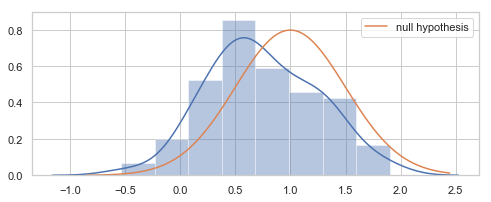

In [28]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu0, scale=sigma).pdf(x), label='null hypothesis')
ax.legend()
plt.show()

## 非参数化方法

上面的方法都有一个强的假设，即数据是来源于一个分布。另外一个构建的方法是不同已知的分布中构建，叫做 KDE（kernel-density estimation）核化密度估计。他可以被看做直方图的平滑版本：
![img](https://ws2.sinaimg.cn/large/69d4185bly1fyc1d41f2pj20k105mglz.jpg)
该方法是通过一每个数据点为中心的核化函数求和来进行概率分布估计：
$$
\large{
\begin{split}
\hat{f}(x) = \frac{1}{n\cdot bw}\sum_{i=0}^{n}K\left(\frac{x-x_i}{bw}\right)
\end{split}
}
$$
其中 bw 是带宽，K 是核化函数（归一化，积分为 1）。bw 是一个非常重要的参数，他定义了每一项在求和中的影响大小，太大了就成了无特征估计，太小会在结构化评估上差生噪声，如上图的中间部分。K 机场使用高斯核，他所产生的图形更平滑。

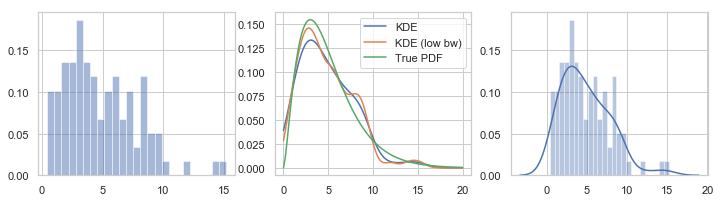

In [32]:
# 采样
X = stats.chi2(df=5)
X_samples = X.rvs(100)

# 核化密度估计，带宽自动设置
kde = stats.kde.gaussian_kde(X_samples)

# 带宽手动设置
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

# 绘图
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(X_samples, density=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])
plt.show()

In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# 统计模型

统计模型可以一般化的表示为：
$$
\large{
\begin{split}
Y = f (X)+ \epsilon
\end{split}
}
$$
其中 $Y$ 是响应变量，$X$ 是解释变量（explanatory variables）。

根据 $\epsilon$ 的不同，可以得到不同的统计模型。每个统计模型都有一组假设，因此在使用的时候一定要留意。对于线性回归，最重要的的假设就是残差是独立的且是正态分布的。

## 使用 Pasty 定义统计模型

如下案例，$y=[1, 2, 3, 4, 5], x_1=[6, 7, 8, 9, 10], x_2=[11,12, 13, 14, 15]$，并定义如下线性关系：$y=\beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2$, 且矩阵 $X = [1, x_1, x_2, x_1x_2]$
```python
In [9]: y = np.array([1, 2, 3, 4, 5])
In [10]: x1 = np.array([6, 7, 8, 9, 10])
In [11]: x2 = np.array([11, 12, 13, 14, 15])
In [12]: X = np.vstack([np.ones(5), x1, x2, x1*x2]).T
In [13]: X
Out[13]: array([[ 1., 6., 11., 66.],
                [ 1., 7., 12., 84.],
                [ 1., 8., 13., 104.],
                [ 1., 9., 14., 126.],
                [ 1., 10., 15., 150.]])
In [14]: beta, res, rank, sval = np.linalg.lstsq(X, y)
In [15]: beta
Out[15]: array([ -5.55555556e-01, 1.88888889e+00, -8.88888889e-01, -1.33226763e-15])
```

Pasty可以提供更便捷的构建方式，常见的构建方法如下：
![image](https://ws4.sinaimg.cn/large/69d4185bly1fyc2e5n7yvj20ih0eg0vl.jpg)

如下示例：
```python
In [16]: data = {"y": y, "x1": x1, "x2": x2}
In [17]: y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)
In [18]: y
Out[18]: DesignMatrix with shape (5, 1)
            y
            1
            2
            3
            4
            5
            Terms:
            'y' (column 0)
In [19]: X
Out[19]: DesignMatrix with shape (5, 4)
            Intercept x1 x2 x1:x2
            1 6 11 66
            1 7 12 84
            1 8 13 106
            1 9 14 126
            1 10 15 150
            Terms:
            'Intercept' (column 0)
            'x1' (column 1)
            'x2' (column 2)
            'x1:x2' (column 3)
In [20]: type(X)
Out[20]: patsy.design_info.DesignMatrix
```

与 numpy、Pandas 之间的数据抓换：
```python
# numpy
In [21]: np.array(X)
Out[21]: array([[ 1., 6., 11., 66.],
                [ 1., 7., 12., 84.],
                [ 1., 8., 13., 104.],
                [ 1., 9., 14., 126.],
                [ 1., 10., 15., 150.]])
# pandas
In [22]: df_data = pd.DataFrame(data)
In [23]: y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")
In [24]: X
Out[24]:
              Intercept  x1  x2  x1:x2
            0        1   6   11   66
            1        1   7   12   84
            2        1   8   13   104
            3        1   9   14   126
            4        1   10  15   150
```

数据拟合
```python
In [25]: model = sm.OLS(y, X)
In [26]: result = model.fit()
In [27]: result.params
Out[27]: Intercept -5.555556e-01
        x1 1.888889e+00
        x2 -8.888889e-01
        x1:x2 -8.881784e-16
        dtype: float64
```
更直接的计算法方法
```python
In [28]: model = smf.ols("y ~ 1 + x1 + x2 + x1:x2", df_data)
In [29]: result = model.fit()
In [30]: result.params
Out[30]: Intercept -5.555556e-01
        x1 1.888889e+00
        x2 -8.888889e-01
        x1:x2 -8.881784e-16
        dtype: float64
```

更多的可参考文档。

## 线性回归

常见的步骤为：

1. 创建模型
1. 拟合
1. 打印拟合的统计信息
1. 处理拟合的结果
1. 可视化拟合

以 $y = 1+ 2x_2 + 3x_2 + 4x_1x_2$

In [49]:
# 创建数据
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
data = pd.DataFrame({"x1": x1, "x2": x2})
def y_true(x1, x2):
    return 1  + 2 * x1 + 3 * x2 + 4 * x1 * x2
data["y_true"] = y_true(x1, x2)

# 模拟噪点
e = 0.5 * np.random.randn(N)
data["y"] = data["y_true"] + e

# 定义模型（最简单的），并拟合
# OLS 的假设是残差是正态分布
model = smf.ols("y ~ x1 + x2", data)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     34.40
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           5.10e-12
Time:                        15:41:05   Log-Likelihood:                -270.15
No. Observations:                 100   AIC:                             546.3
Df Residuals:                      97   BIC:                             554.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6317      0.373      4.373      0.0

图形化比较，如果是一条直线说明假设成立。可以看到我们的正态分布假设不成立。

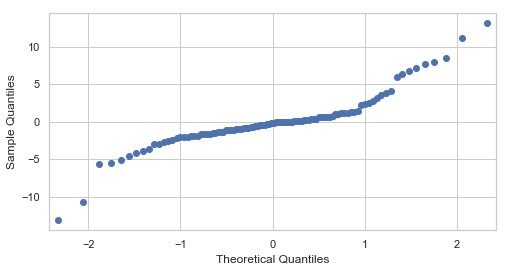

In [50]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)
plt.show()

以上表明我们的模型匹配的不够好，我们需要重新改进模型。可以改进之后模型的 R-squared 提高了很多。

In [51]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2391.
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           4.93e-90
Time:                        15:41:09   Log-Likelihood:                -80.601
No. Observations:                 100   AIC:                             169.2
Df Residuals:                      96   BIC:                             179.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9299      0.057     16.203      0.0

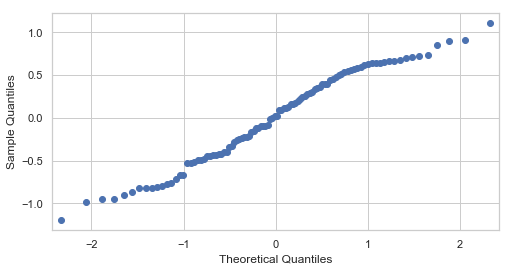

In [52]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)
plt.show()

有了模型就可以进行预测，并对比真是与预测模型。

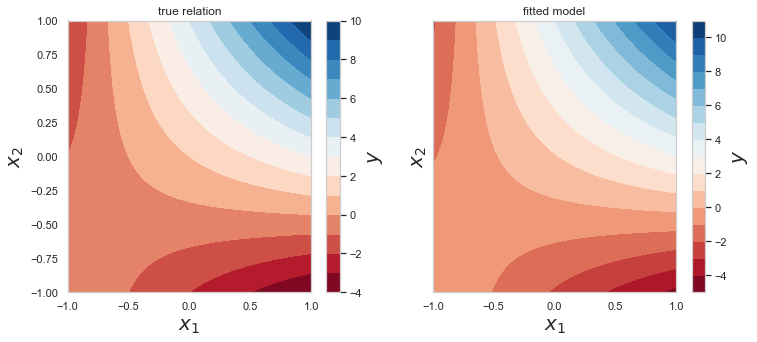

In [55]:
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

# 预测
y_pred = result.predict(new_data)
y_pred = y_pred.values.reshape(50, 50)

# 绘图
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")
plt.show()

## 离散回归

### 逻辑回归

逻辑回归，线性回归的泛化，用于分类。一下以鸢尾花为例：

In [56]:
df = sm.datasets.get_rdataset("iris").data
# 数据集信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [57]:
# 类别信息
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [58]:
# 二分类，只关注两个类别，并将其映射为 0 和 1 两个值
df_subset = df[(df.Species == "versicolor") | (df.Species == "virginica")].copy()
df_subset.Species = df_subset.Species.map({"versicolor": 1, "virginica": 0})

# 梳理数据
df_subset.rename(columns={"Sepal.Length": "Sepal_Length",
                          "Sepal.Width": "Sepal_Width",
                          "Petal.Length": "Petal_Length",
                          "Petal.Width": "Petal_Width"}, inplace=True)

# 使用二分类法拟合数据
model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Dec 2018   Pseudo R-squ.:                  0.8517
Time:                        15:55:25   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.754

In [59]:
# 变量的影响效果
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Petal_Length    -0.1736      0.052     -3.347      0.001      -0.275      -0.072
Petal_Width     -0.3151      0.068     -4.608      0.000      -0.449      -0.181


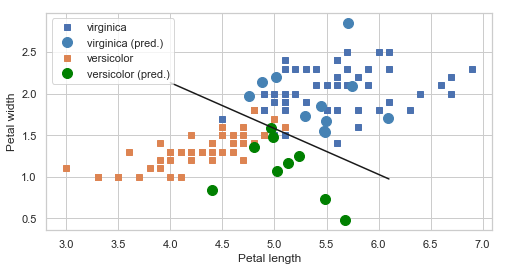

In [61]:
# 预测
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,
                       "Petal_Width": np.random.randn(20)*0.5 + 1.7})
# 概率
df_new["P-Species"] = result.predict(df_new)
# 类别
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)

# 分割线
params = result.params
alpha0 = -params['Intercept']/params['Petal_Width']
alpha1 = -params['Petal_Length']/params['Petal_Width']

# 绘图：方块是拟合数据，圆圈是预测数据
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# species virginica
ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
        df_subset[df_subset.Species == 0].Petal_Width.values, 's',
        label='virginica')
ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
        df_new[df_new.Species == 0].Petal_Width.values,
        'o', markersize=10, color="steelblue", label='virginica (pred.)')

# species versicolor
ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
        df_subset[df_subset.Species == 1].Petal_Width.values, 's',
        label='versicolor')
ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
        df_new[df_new.Species == 1].Petal_Width.values,
        'o', markersize=10, color="green", label='versicolor (pred.)')

# boundary line
_x = np.array([4.0, 6.1])
ax.plot(_x, alpha0 + alpha1 * _x, 'k')
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
plt.show()

### 泊松模型

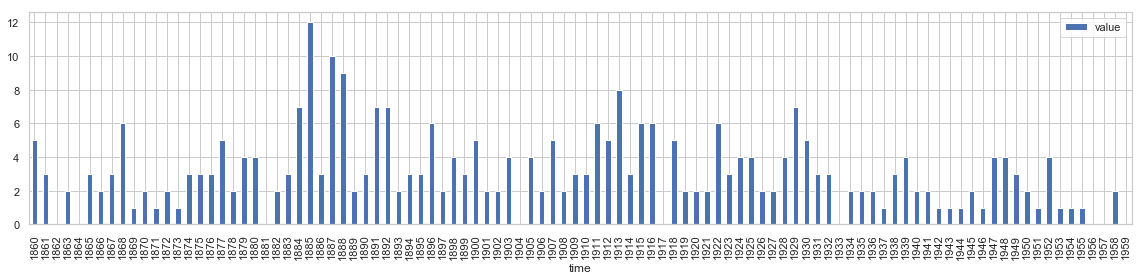

In [75]:
dataset = sm.datasets.get_rdataset("discoveries")
df = dataset.data.set_index("time")
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df.plot(kind='bar', ax=ax)
fig.tight_layout()
plt.show()

对以上数据的分布作出泊松分布的假设。

In [76]:
# 只用单个截距作为系数的泊松分布
model = smf.poisson("value ~ 1", data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 2.168457
         Iterations 1
                          Poisson Regression Results                          
Dep. Variable:                  value   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Wed, 19 Dec 2018   Pseudo R-squ.:                   0.000
Time:                        16:34:44   Log-Likelihood:                -216.85
converged:                       True   LL-Null:                       -216.85
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1314      0.057     19.920      0.000       1.020       1.243


置信区间：                   0         1
Intercept  1.020084  1.242721


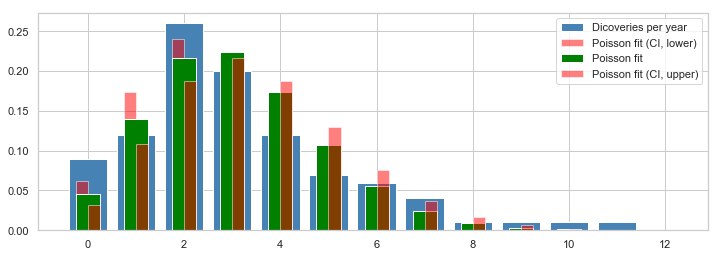

In [77]:
#  λ 参数，泊松分布式指数函数
lmbda = np.exp(result.params)
# 获取泊松分布
X = stats.poisson(lmbda)
# 获取结果的置信区间
print('置信区间：', result.conf_int())

# 绘图
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])

v, k = np.histogram(df.values, bins=12, range=(0, 12), normed=True)
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(k[:-1], v, color="steelblue", align='center', label='Dicoveries per year')
ax.bar(k-0.125, X_ci_l.pmf(k), color="red", alpha=0.5, align='center', width=0.25,
       label='Poisson fit (CI, lower)')
ax.bar(k, X.pmf(k), color="green", align='center', width=0.5, label='Poisson fit')
ax.bar(k+0.125, X_ci_u.pmf(k), color="red", alpha=0.5, align='center', width=0.25,
       label='Poisson fit (CI, upper)')
ax.legend()
plt.show()

## 时序数据

时序数据常使用 autoregression (AR) 进行处理：
$$
\large{
\begin{split}
Y_t = \beta_0 + \sum_{n=1}^{p}\beta_nY_{t-n} + \epsilon_t
\end{split}
}
$$

其中 $\beta_0$ 是一个常量， $\beta_n, 1 \le n \le N$ 是系数，$\epsilon_t$ 是白色噪点。

如果 数据只依赖于前一个值，那么可以记为AR(1)，依赖前两个值可以记为AR(2)。ARMA（autoagression moving average） 模型是 AR 模型的特例，他包含了前序列前 q 个残差的移动平均（moving average），其中 $\theta_n$ 是移动平均的权重因子：
$$
\large{
\begin{split}
Y_t = \beta_0 + \sum_{n=1}^{p}\beta_nY_{t-n} + \sum_{n=1}^{q}\theta_n\epsilon_{t-n} + \epsilon_t
\end{split}
}
$$

ARMA 通常记为 ARMA(p,q)，p 是自动回归项的个数，q 是移动平均项的个数。

可以使用 `sm.tsa` 来完成操作，下面以天气数据为例。

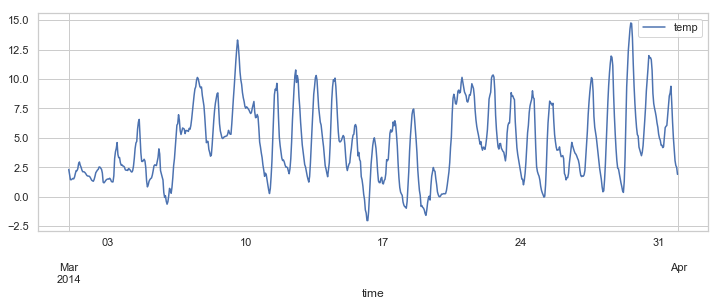

In [114]:
df = pd.read_csv("temperature_outdoor_2014.tsv", header=None, delimiter="\t",
                 names=["time", "temp"])
df.time = pd.to_datetime(df.time, unit="s")
df = df.set_index("time").resample("H").mean()

# 提取出四月和五月的数据
df_march = df[df.index.month == 3]
df_april = df[df.index.month == 4]

df_march.plot(figsize=(12, 4));

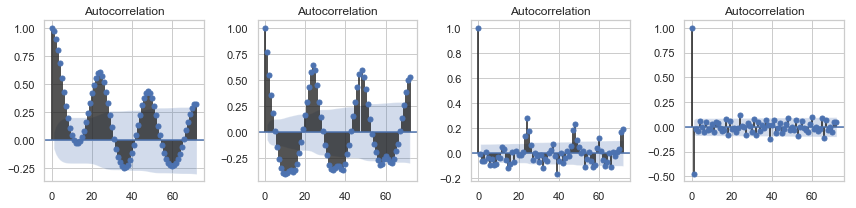

In [115]:
# 通过图示，展示 AR
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
smg.tsa.plot_acf(df_march.temp, lags=72, ax=axes[0])
smg.tsa.plot_acf(df_march.temp.diff().dropna(), lags=72, ax=axes[1])
smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(), lags=72, ax=axes[2])
smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(), lags=72, ax=axes[3])
fig.tight_layout()
plt.show()

AR 模型创建

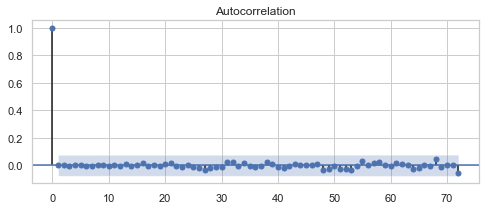

In [116]:
model = sm.tsa.AR(df_march.temp)
# 预测三天的数据
result = model.fit(72)
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
smg.tsa.plot_acf(result.resid, lags=72, ax=ax)
plt.show()

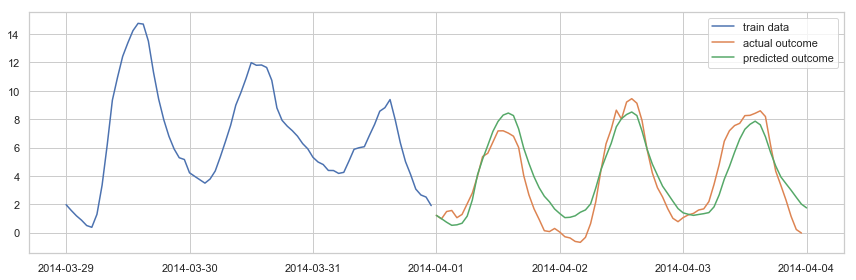

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df_march.index.values[-72:], df_march.temp.values[-72:], label="train data")
ax.plot(df_april.index.values[:72], df_april.temp.values[:72], label="actual outcome")
ax.plot(pd.date_range("2014-04-01", "2014-04-4", freq="H").values,
        result.predict("2014-04-01", "2014-04-4"), label="predicted outcome")

ax.legend()
fig.tight_layout()